<a href="https://colab.research.google.com/github/tanya12181/Machine-Learning-Internship-at-Internity/blob/main/Task_8_digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('mnist_train_small.csv')
df.head()
df.fillna(128)
df.sort_values(by='0.530')

,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,...,0.551,0.552,0.553,0.554,0.555,0.556,0.557,0.558,0.559,0.560,0.561,0.562,0.563,0.564,0.565,0.566,0.567,0.568,0.569,0.570,0.571,0.572,0.573,0.574,0.575,0.576,0.577,0.578,0.579,0.580,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13334,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13333,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13332,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13331,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4617,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19715,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4407,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4794,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [3]:
#dividing the dataset into training and testing dataset in 2:1 ratio
idx=int(15*df.shape[0]/100)
df=np.array(df)
idx1=idx*2//3 +1
idx2=idx//3 +1
train=df[:idx1,:]
test= df[idx1:idx1+idx2,:]
print('size of testing set: ',test.shape)
print(test)
print('size of training set: ',train.shape)
print(train)

size of testing set:  (1000, 785)
[[5 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [5 0 0 ... 0 0 0]
 [5 0 0 ... 0 0 0]
 [5 0 0 ... 0 0 0]]
size of training set:  (2000, 785)
[[5 0 0 ... 0 0 0]
 [7 0 0 ... 0 0 0]
 [9 0 0 ... 0 0 0]
 ...
 [5 0 0 ... 0 0 0]
 [6 0 0 ... 0 0 0]
 [7 0 0 ... 0 0 0]]


In [4]:
#to create a list of columns having same values for every label
#If for each number we will have the same pixel value, it doesn't 
#help in determining anything new.So, we remove such columns.
# columns=[]
# for i in range(1,df.shape[1]):
#     check=True
#     for j in range(df.shape[0]):
#         if df[j][i]!=df[j-1][i]:
#             check=False
#             break
#     if check==False:
#         columns.append(i)
        
# len(columns)
# columns = np.arange(0,785)

In [5]:
import math
def EuclideanDistance(row1,row2):
    dist=np.sum((row1-row2)**2)
    return math.sqrt(dist)


def KNNClassifier(trainSet, testInst, K,count):
    neighbours=[]
    
    for row in range(trainSet.shape[0]):
        dist=EuclideanDistance(trainSet[row],testInst)
        neighbours.append((trainSet[row][0],dist))
        
    neighbours=sorted(neighbours, key = lambda x:x[1])
    
    for i in range(K):
        label=neighbours[i][0]
        count[label]+=1
    maxCount=0
    ResultLabel=-1
    for label in count:
        if count[label]>maxCount:
            maxCount=count[label]
            ResultLabel=label
    return ResultLabel,count


def TestAccuracy(test,prediction):
    correct=0
    for i in range(test.shape[0]):
        if test[i][0]==prediction[i]:
            correct+=1
    return (correct/test.shape[0])*100


def plotAccuracy(accuracy):
  plt.plot(accuracy)
  plt.xlabel('K-values')
  plt.ylabel('Accuracy')

In [6]:
#Creating a sample test instance for checking my functions
# testInstance=np.random.randint(0,255,df.shape[1])
# print(testInstance)
# print()
# print(testInstance.shape)

# k = math.sqrt(train.shape[0])
# k = math.floor(k)
# if k%2==0: k=k-1
# PredictedLabel = KNNClassifier(train,testInstance,k)
# PredictedLabel

In [7]:
#getting test dataset
test

array([[5, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [5, 0, 0, ..., 0, 0, 0],
       [5, 0, 0, ..., 0, 0, 0],
       [5, 0, 0, ..., 0, 0, 0]])

In [9]:
testK=math.sqrt(test.shape[0])
testK=math.floor(testK)
if testK%2==0: testK-=1

accuracy_val=[]
for j in range(1,41,2):
  Predictions=[]
  for i in range(test.shape[0]):
    count={}.fromkeys([0,1,2,3,4,5,6,7,8,9],0)
    p,count=KNNClassifier(train,test[i],j,count)
    Predictions.append(p)
  accuracy = TestAccuracy(test,Predictions)
  accuracy_val.append(accuracy)
  print(f"% accuracy for k={j} is {accuracy}% ")

% accuracy for k=1 is 89.5% 
% accuracy for k=3 is 89.9% 
% accuracy for k=5 is 89.8% 
% accuracy for k=7 is 89.60000000000001% 
% accuracy for k=9 is 88.4% 
% accuracy for k=11 is 88.1% 
% accuracy for k=13 is 87.7% 
% accuracy for k=15 is 87.5% 
% accuracy for k=17 is 87.0% 
% accuracy for k=19 is 86.8% 
% accuracy for k=21 is 86.8% 
% accuracy for k=23 is 86.1% 
% accuracy for k=25 is 85.9% 
% accuracy for k=27 is 86.0% 
% accuracy for k=29 is 84.8% 
% accuracy for k=31 is 84.89999999999999% 
% accuracy for k=33 is 84.6% 
% accuracy for k=35 is 84.3% 
% accuracy for k=37 is 83.6% 
% accuracy for k=39 is 83.2% 


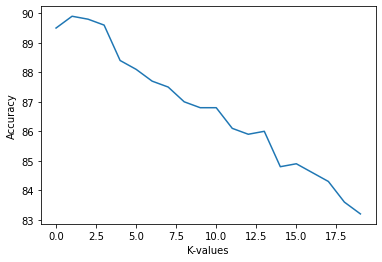

In [10]:
 plotAccuracy(accuracy_val)